In [54]:
pip install seaborn imblearn

Note: you may need to restart the kernel to use updated packages.


logistic regression: https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
medium: https://3liud.medium.com/supervised-ml-applications-60cb5ae350a2

In [55]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [56]:
from project_data_preparation import dg;
dg
dg.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4873 entries, 0 to 4872
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   loan_id                    4873 non-null   int64   
 1   monthly_income             4873 non-null   float64 
 2   origination_score_band     4873 non-null   category
 3   TOB_months                 4873 non-null   float64 
 4   closing_principal_balance  4873 non-null   float64 
 5   original_loan_amount       4873 non-null   float64 
 6   product                    4873 non-null   category
 7   original_loan_term         4873 non-null   int64   
 8   remaining_loan_term        4873 non-null   int64   
 9   delq_history               4873 non-null   object  
 10  target                     4873 non-null   category
 11  origination_score_band_1   4873 non-null   float64 
 12  origination_score_band_2   4873 non-null   float64 
 13  origination_score_band_3   4873 n

In [57]:
dg['target'].value_counts()

0    3413
1    1460
Name: target, dtype: int64

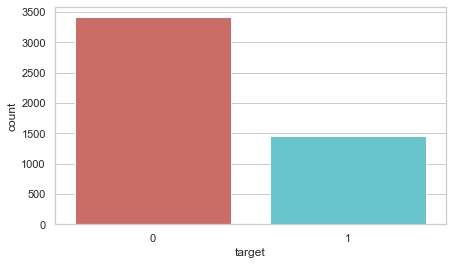

In [58]:
plt.figure(figsize=(7,4))
sns.countplot(x="target",data = dg, palette="hls" )
plt.show()
# plt.savefig("count_plot")

In [59]:
count_roll = len(dg[dg['target']==1])
count_no_roll = len(dg[dg['target']==0])
perc_roll = count_roll/len(dg)
perc_no_roll= count_no_roll/(len(dg))
print(f"percentage of roll: {perc_roll*100:.2f}")
print(f"percentage of no roll: {perc_no_roll*100:.2f}")

percentage of roll: 29.96
percentage of no roll: 70.04


Exploratory Data Analysis

In [60]:
dg.groupby('target').mean()

,loan_id,monthly_income,TOB_months,closing_principal_balance,original_loan_amount,original_loan_term,remaining_loan_term,origination_score_band_1,origination_score_band_2,origination_score_band_3,...,product_A,product_B,product_C,product_D,delq_1,delq_2,delq_3,delq_4,delq_5,delq_6
target,,,,,,,,,,,,,,,,,,,,,
0,3610.357164,14862.877234,27.939057,5964.031644,6899.958980,62.178142,39.605626,0.054498,0.128919,0.269558,...,0.504541,0.355992,0.069147,0.070319,0.196601,0.176970,0.158219,0.101377,0.090243,0.064166
1,3631.954795,13367.465753,29.467808,5298.280822,6184.116438,61.964384,39.681507,0.051370,0.065068,0.234247,...,0.519863,0.231507,0.091781,0.156849,0.148630,0.202055,0.149315,0.117808,0.080822,0.113699


In [61]:
dg.groupby(['product','target']).mean()

loan_id  monthly_income  TOB_months  \
product target                                            
A       0       3641.105110    10057.926829   25.163182   
        1       3631.613966    10624.505929   26.866930   
B       0       3502.173663    23796.296296   35.273251   
        1       3503.997041    24390.532544   44.390533   
C       0       3800.262712     3060.381356   16.872881   
        1       3713.888060     3179.104478   24.044776   
D       0       3750.679167    15718.750000   21.608333   
        1       3774.004367    12150.655022   19.235808   

                closing_principal_balance  original_loan_amount  \
product target                                                    
A       0                     4166.585366           4700.563298   
        1                     4480.816864           4863.346509   
B       0                     9427.135802          11014.493827   
        1                     9133.964497          11399.497041   
C       0                      980.254237           1350.805085   
        1                      937.462687           1406.343284   
D       0                     6229.458333           7307.458333   
        1                     4898.034934           5659.606987   

                original_loan_term  remaining_loan_term  \
product target                                            
A       0                68.242160            45.915796   
        1                68.490119            44.559947   
B       0                59.234568            31.845267   
        1                56.609467            28.375740   
C       0                35.300847            22.741525   
        1                45.447761            26.052239   
D       0                60.000000            50.200000   
        1                57.903930            48.174672   

                origination_score_band_1  origination_score_band_2  \
product target                                                       
A       0                       0.092334                  0.137631   
        1                       0.077734                  0.076416   
B       0                       0.000000                  0.128395   
        1                       0.000000                  0.000000   
C       0                       0.000000                  0.076271   
        1                       0.000000                  0.000000   
D       0                       0.112500                  0.120833   
        1                       0.069869                  0.161572   

                origination_score_band_3  ...  product_A  product_B  \
product target                            ...                         
A       0                       0.198026  ...        1.0        0.0   
        1                       0.192358  ...        1.0        0.0   
B       0                       0.347325  ...        0.0        1.0   
        1                       0.281065  ...        0.0        1.0   
C       0                       0.271186  ...        0.0        0.0   
        1                       0.328358  ...        0.0        0.0   
D       0                       0.387500  ...        0.0        0.0   
        1                       0.248908  ...        0.0        0.0   

                product_C  product_D    delq_1    delq_2    delq_3    delq_4  \
product target                                                                 
A       0             0.0        0.0  0.222416  0.211382  0.192799  0.119048   
        1             0.0        0.0  0.069829  0.086957  0.060606  0.035573   
B       0             0.0        0.0  0.158848  0.158025  0.125926  0.086420   
        1             0.0        0.0  0.319527  0.479290  0.316568  0.316568   
C       0             1.0        0.0  0.194915  0.080508  0.148305  0.033898   
        1             1.0        0.0  0.291045  0.223881  0.074627  0.074627   
D       0             0.0        1.0  0.204167  0.120833  0.083333  0.116667   
        1             0.0        1.

In [62]:
dg.groupby('origination_score_band').mean()

,loan_id,monthly_income,TOB_months,closing_principal_balance,original_loan_amount,original_loan_term,remaining_loan_term,origination_score_band_1,origination_score_band_2,origination_score_band_3,...,product_A,product_B,product_C,product_D,delq_1,delq_2,delq_3,delq_4,delq_5,delq_6
origination_score_band,,,,,,,,,,,,,,,,,,,,,
1,3661.390805,8813.218391,24.632184,3546.206897,4095.325670,68.827586,48.570881,1.0,0.0,0.0,...,0.835249,0.000000,0.000000,0.164751,0.065134,0.153257,0.076628,0.038314,0.034483,0.072797
2,3610.497196,12857.943925,23.295327,5536.691589,6051.009346,61.514019,42.289720,0.0,1.0,0.0,...,0.551402,0.291589,0.033645,0.123364,0.194393,0.194393,0.173832,0.050467,0.052336,0.033645
3,3622.126783,15645.998415,32.019017,6074.627575,7256.109350,60.743265,36.367670,0.0,0.0,1.0,...,0.385895,0.409667,0.085578,0.118859,0.194929,0.203645,0.125990,0.112520,0.073693,0.081616
4,3595.636103,15800.143266,29.161414,6282.664756,7296.198663,61.396371,38.328558,0.0,0.0,0.0,...,0.411652,0.441261,0.043935,0.103152,0.194842,0.147087,0.154728,0.127985,0.091691,0.120344
5,3609.398545,13971.705740,28.402587,5530.024252,6476.176233,62.061439,40.121261,0.0,0.0,0.0,...,0.540825,0.284559,0.115602,0.059014,0.198868,0.243331,0.210186,0.136621,0.131770,0.088116
6,3656.309446,15461.726384,24.856678,6396.710098,7163.550489,63.986971,43.179153,0.0,0.0,0.0,...,0.635179,0.185668,0.117264,0.061889,0.117264,0.058632,0.091205,0.061889,0.061889,0.032573
7,3655.945312,14806.640625,26.078125,6181.875000,6833.203125,66.703125,39.523438,0.0,0.0,0.0,...,0.703125,0.070312,0.148438,0.078125,0.148438,0.070312,0.070312,0.000000,0.062500,0.000000
8,3609.739583,8867.187500,25.458333,3783.333333,4072.708333,61.625000,39.958333,0.0,0.0,0.0,...,1.000000,0.000000,0.000000,0.000000,0.166667,0.166667,0.281250,0.177083,0.104167,0.000000


Visualizations

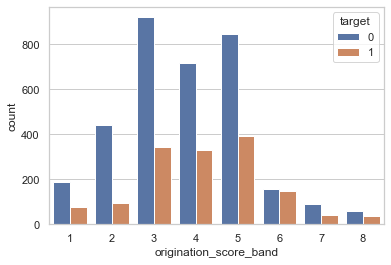

In [63]:
sns.countplot(x='origination_score_band', data=dg, hue="target")
plt.show()

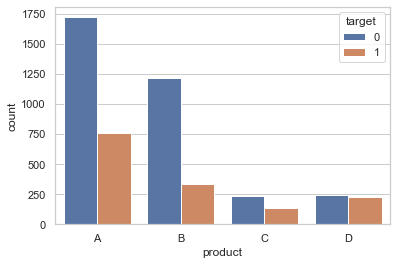

In [64]:
sns.countplot(x='product', data=dg, hue="target")
plt.show()

Text(0, 0.5, 'Deliquency')

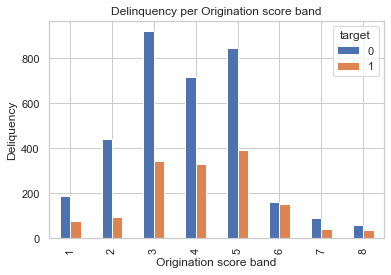

In [65]:
%matplotlib inline
pd.crosstab(dg.origination_score_band, dg.target ).plot(kind='bar')
plt.title('Delinquency per Origination score band')
plt.xlabel('Origination score band')
plt.ylabel('Deliquency')
# plt.savefig('Delinquency per product')

<Figure size 1080x360 with 0 Axes>

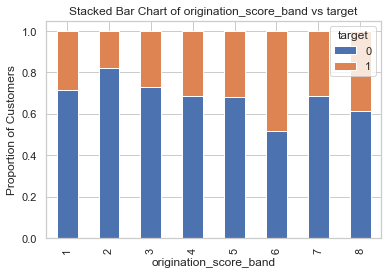

In [66]:
table=pd.crosstab(dg.origination_score_band,dg.target)
plt.figure(figsize=(15,5))
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of origination_score_band vs target')
plt.xlabel('origination_score_band')
plt.ylabel('Proportion of Customers')
# plt.savefig('mariral_vs_pur_stack')
plt.show()

<AxesSubplot:xlabel='monthly_income'>

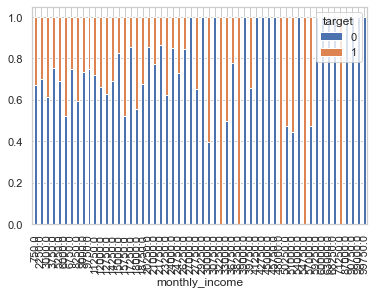

In [67]:
# plt.figure(figsize=(20,5))
table=pd.crosstab(dg.monthly_income,dg.target)
table
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
# plt.title('Stacked Bar Chart of Montlhy Income vs Target')
# plt.xlabel('Monthly Income')
# plt.ylabel('Proportion of Customers')
# plt.savefig('mariral_vs_pur_stack')
# plt.show()

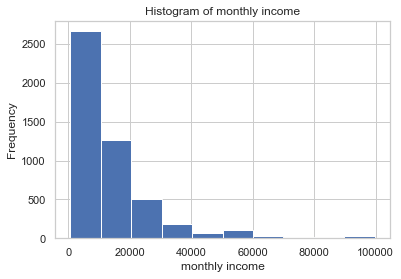

In [68]:
dg.monthly_income.hist()
plt.title('Histogram of monthly income')
plt.xlabel('monthly income')
plt.ylabel('Frequency')
plt.show()
# plt.savefig('hist_age')

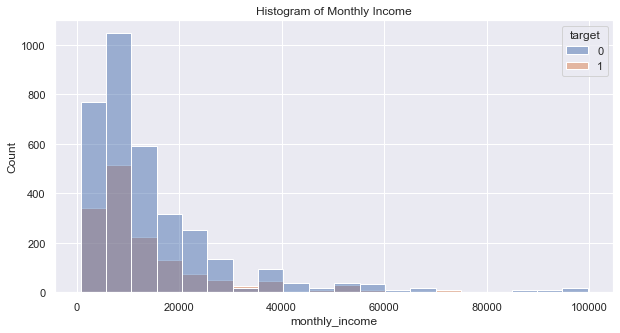

In [69]:
# dg.plot(kind='histogram')
# https://www.python-graph-gallery.com/20-basic-histogram-seaborn
plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
sns.histplot(data=dg, x ="monthly_income", hue="target", bins=20)
plt.title('Histogram of Monthly Income')
plt.show()

# One-hot encoding of Categorical Data

https://towardsdatascience.com/categorical-variables-for-machine-learning-algorithms-d2768d587ab6

Converting Origination Score Band into binary data

In [70]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
onehotarray = encoder.fit_transform(dg[["origination_score_band"]]).toarray()
items = [f'{"origination_score_band"}_{item}' for item in encoder.categories_[0]]
dg[items] = onehotarray
# ,"product","delq_history"

Converting Product into binary data

In [71]:
encoder = OneHotEncoder()
onehotarray = encoder.fit_transform(dg[["product"]]).toarray()
items = [f'{"product"}_{item}' for item in encoder.categories_[0]]
dg[items] = onehotarray

separating Delq_history into columns

In [72]:
def funct(x,i):
    return x[i]
        
for i in range(6):        
    dg[f'delq_{i+1}'] = dg['delq_history'].apply(funct,args=(i,))
# # len(dg['delq_history'])



P-Test to check for statistical significance


In [73]:
from scipy import stats

corr_df = pd.DataFrame(columns=['r', 'P-value'])

for col in dg:
    if pd.api.types.is_numeric_dtype(dg[col]):
        r , p = stats.pearsonr(dg.target, dg[col])
        corr_df.loc[col] = [round(r, 4), round(p, 4)]
    
corr_df

,r,P-value
loan_id,0.0065,0.6494
monthly_income,-0.0491,0.0006
TOB_months,0.0427,0.0029
closing_principal_balance,-0.0383,0.0075
original_loan_amount,-0.0381,0.0079
original_loan_term,-0.0041,0.7742
remaining_loan_term,0.0014,0.9230
origination_score_band_1,-0.0064,0.6570
origination_score_band_2,-0.0936,0.0000
origination_score_band_3,-0.0369,0.0099


original_loan_term
remaining_loan_term
delq_2
delq_3
delq_4
delq_5
delq_6

# Machine Learning

In [103]:
y = dg.target.values

x_data = dg.drop(['loan_id','target','delq_history','product','origination_score_band'], axis='columns') 
# x_data = dg.drop(['loan_id','target','delq_history','product','origination_score_band','origination_score_band_1','origination_score_band_2','origination_score_band_3','origination_score_band_4','origination_score_band_5','origination_score_band_6','origination_score_band_7','origination_score_band_8',"original_loan_term", "remaining_loan_term","delq_2", "delq_3", "delq_4", "delq_5", "delq_6",'product_A'], axis='columns') 


In [104]:
x_data

,monthly_income,TOB_months,closing_principal_balance,original_loan_amount,original_loan_term,remaining_loan_term,origination_score_band_1,origination_score_band_2,origination_score_band_3,origination_score_band_4,...,product_A,product_B,product_C,product_D,delq_1,delq_2,delq_3,delq_4,delq_5,delq_6
0,6000.0,83.0,300.0,1800.0,24,5,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0,0,0,0,0,0
1,39000.0,82.0,7200.0,11700.0,60,42,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0,1,0,0,0,0
2,18000.0,78.0,2700.0,5400.0,60,46,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0,0,1,0,0,0
3,23250.0,76.0,3900.0,6900.0,60,48,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1,1,0,1,0,0
4,12000.0,74.0,2100.0,3600.0,60,50,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4868,8250.0,6.0,6000.0,6000.0,36,35,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0,0,0,0,0,0
4869,2250.0,6.0,1500.0,1500.0,12,11,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0,0,0,0,0,0
4870,3750.0,6.0,3000.0,3000.0,60,65,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0,0,0,0,0,0
4871,9750.0,6.0,7500.0,7500.0,60,65,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0,0,0,0,0,0


In [105]:
x_data
y[1:10]

[0, 0, 1, 0, 0, 0, 1, 1, 1]
Categories (2, int64): [0, 1]

In [106]:
#Normalization to handle unbalanced features 
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data)).values
x.describe()

C:\Users\aduno\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\aduno\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


,monthly_income,TOB_months,closing_principal_balance,original_loan_amount,original_loan_term,remaining_loan_term,origination_score_band_1,origination_score_band_2,origination_score_band_3,origination_score_band_4,...,product_A,product_B,product_C,product_D,delq_1,delq_2,delq_3,delq_4,delq_5,delq_6
count,4873.000000,4873.000000,4873.000000,4873.000000,4873.000000,4873.000000,4873.000000,4873.000000,4873.000000,4873.000000,...,4873.000000,4873.000000,4873.000000,4873.000000,4873.000000,4873.000000,4873.000000,4873.000000,4873.000000,4873.000000
mean,0.138029,0.290871,0.064297,0.073253,0.278412,0.223889,0.053560,0.109789,0.258978,0.214857,...,0.509132,0.318695,0.075929,0.096245,0.060743,0.061495,0.051850,0.035433,0.029140,0.019752
std,0.140877,0.213240,0.090340,0.095804,0.132350,0.141819,0.225171,0.312658,0.438118,0.410766,...,0.499968,0.466018,0.264911,0.294957,0.141520,0.169324,0.145486,0.124251,0.115482,0.094123
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.053030,0.129870,0.014529,0.018910,0.266667,0.129944,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.090909,0.233766,0.035414,0.041157,0.266667,0.225989,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.174242,0.415584,0.076050,0.088988,0.266667,0.288136,0.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Splitting the data

In [107]:
# Split the data into training and test set. We use 20% test data with a random state of 42 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=42)

# Logistic Regression Classification Approach

Create a model and fit it


In [108]:
model = LogisticRegression(max_iter=5251).fit(x_train, y_train)


Get results

In [109]:
# Attributes of the model
lr_score = model.score(x_train,y_train)
print(f"Test accuracy: {lr_score}")
print(f"intercept: {model.intercept_}")     #value of y when x = 0
print(f"slope: {model.coef_}")              #gradient of slope

Test accuracy: 0.7036059806508356
intercept: [-1.046216]
slope: [[ 0.02712065  1.38529693  0.57640718 -0.42472863 -0.36742951  0.66986724
  -0.2897298  -0.66819778 -0.20476781  0.11979916  0.00830456  0.85101865
  -0.09390079  0.27517146 -0.15509485 -0.89766742  0.28639098  0.76406895
  -1.05238405  0.66185054 -0.21029523  0.87695995 -2.00956763  1.40840782]]


Predict responses

In [110]:
y_pred = model.predict(x_train)
print(f"predicted response:\n{y_pred} \n{y_train}")

predicted response:
[0 0 0 ... 0 0 1] 
[1, 1, 0, 0, 0, ..., 0, 0, 0, 0, 1]
Length: 3411
Categories (2, int64): [0, 1]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


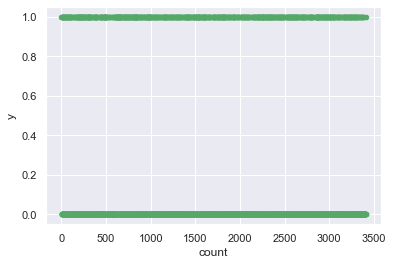

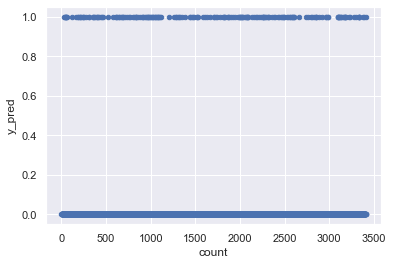

In [111]:
y_compare = pd.DataFrame({"y":list(y_train),"y_pred":list(y_pred)}, index = range(0,len(y_train)))
y_compare["count"]=range(0,len(y_train))
y_compare

y_compare.plot(kind = "scatter", x="count",y="y", color='g')
y_compare.plot(kind = "scatter", x="count",y="y_pred")
plt.show()

Evaluating the logistic regression 

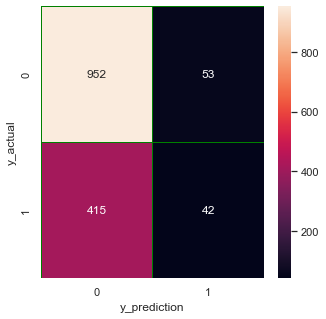

In [112]:
from sklearn.metrics import confusion_matrix

y_prediction = model.predict(x_test)
y_actual = y_test
cm = confusion_matrix(y_actual, y_prediction)

# heatmap visulization of confusion matrix
f, ax = plt.subplots(figsize =(5, 5))
sns.heatmap(cm, annot = True, linewidth=1, linecolor="green", fmt =".0f", ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()     

# KNN Classification Approach


In [113]:
# import KNN classification model
from sklearn.neighbors import KNeighborsClassifier
k= 1
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
print("{} nn score: {}".format(k, knn.score(x_test, y_test)))

knn_score = knn.score(x_test, y_test)

1 nn score: 0.9835841313269493


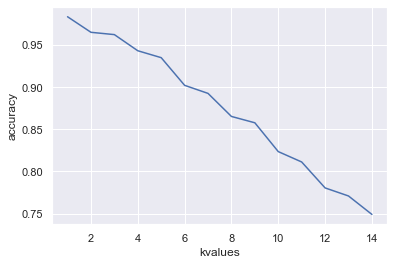

In [114]:
# testing differnt vaues of k with accuracy to determine the most favorable
# k ranges from 1-15
score_list = []
for each in range(1, 15):
    knn2 = KNeighborsClassifier(n_neighbors= each)
    knn2.fit(x_train, y_train)
    score_list.append(knn2.score(x_test, y_test))
    
plt.plot(range(1, 15), score_list)
plt.xlabel("kvalues")
plt.ylabel("accuracy")
plt.show()

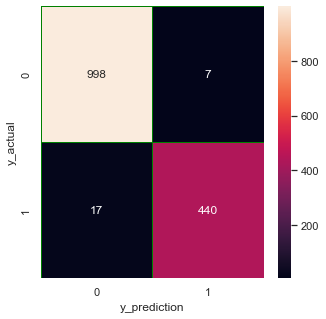

In [115]:
#confusion matrix
y_prediction = knn.predict(x_test)
y_actual=y_test
cm = confusion_matrix(y_actual, y_prediction)

# Heatmap visualization of conusion matrix
f, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(cm, annot =  True, linewidths=1, linecolor = "green", fmt = ".0f", ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


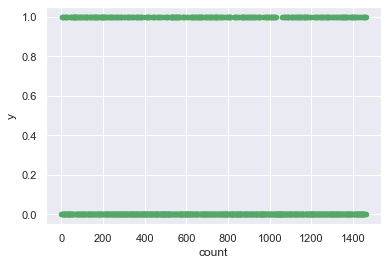

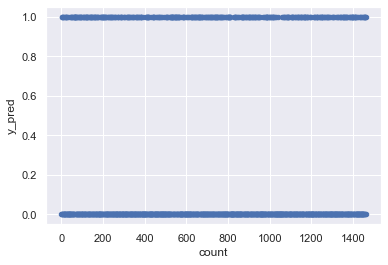

In [116]:
y_compare = pd.DataFrame({"y":list(y_actual),"y_pred":list(y_prediction)}, index = range(0,len(y_actual)))
y_compare["count"]=range(0,len(y_actual))
y_compare

y_compare.plot(kind = "scatter", x="count",y="y", color='g')
y_compare.plot(kind = "scatter", x="count",y="y_pred")
plt.show()

# Decision Tree Approach

In [117]:
# Decision tree approach
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 50)
dt.fit(x_train, y_train)

print("score: ", dt.score(x_test, y_test))

dt_score = dt.score(x_test, y_test)

score:  0.993844049247606


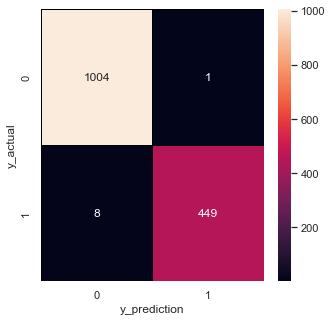

In [118]:
# confsion matrix
y_prediction2 = dt.predict(x_test)
y_actual2 = y_test
cm = confusion_matrix(y_actual2, y_prediction2)

# heatmap
f, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(cm, annot = True, linewidths=1, linecolor="black", fmt =".0f", ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


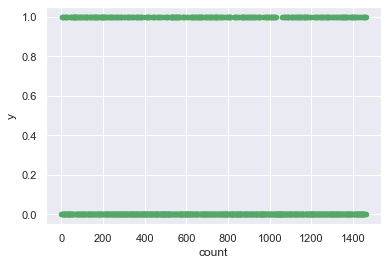

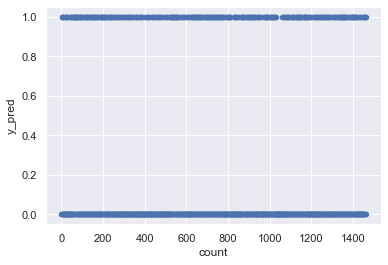

In [119]:
y_compare = pd.DataFrame({"y":list(y_actual2),"y_pred":list(y_prediction2)}, index = range(0,len(y_actual2)))
y_compare["count"]=range(0,len(y_actual2))
y_compare

y_compare.plot(kind = "scatter", x="count",y="y", color='g')
y_compare.plot(kind = "scatter", x="count",y="y_pred")
plt.show()

# Random Forest Classification

In [120]:
# random forest classification
from sklearn.ensemble import RandomForestClassifier
# set n_estimators to 100 whcih means the model will use 100 subsets
rf = RandomForestClassifier(n_estimators = 100, random_state = 30)
rf.fit(x_train, y_train)
print("random forest model score: ", rf.score(x_test, y_test))
rf_score= rf.score(x_test, y_test)

random forest model score:  0.9911080711354309


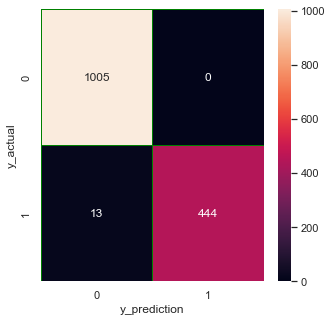

In [121]:
# confusion matrix
y_prediction3 = rf.predict(x_test)
y_actual3 = y_test
cm = confusion_matrix(y_actual3, y_prediction3)

# Heatmap
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True, linewidths=0.5, linecolor = "green", fmt = ".0f", ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


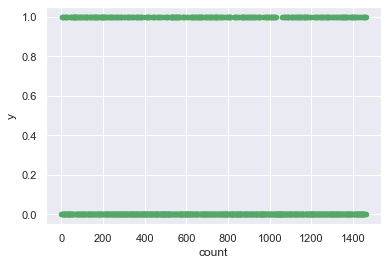

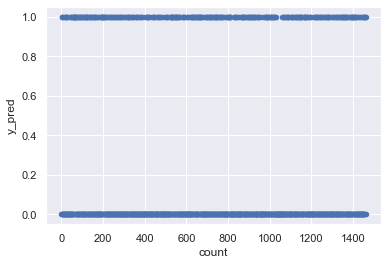

In [122]:
y_compare = pd.DataFrame({"y":list(y_actual3),"y_pred":list(y_prediction3)}, index = range(0,len(y_actual3)))
y_compare["count"]=range(0,len(y_actual3))
y_compare

y_compare.plot(kind = "scatter", x="count",y="y", color='g')
y_compare.plot(kind = "scatter", x="count",y="y_pred")
plt.show()

# Support Vector Machine(SVM)

In [123]:
# SVM approach
from sklearn.svm import SVC
svm = SVC(random_state = 42)
svm.fit(x_train, y_train)

print("Accuracy of SVM: ", svm.score(x_test, y_test))

svm_score = svm.score(x_test, y_test)

Accuracy of SVM:  0.7339261285909713


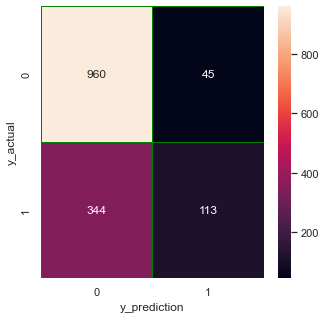

In [124]:

# Confusion matrix
from turtle import color


y_prediction4 = svm.predict(x_test)
y_actual4 = y_test
cm = confusion_matrix(y_actual4, y_prediction4)

# Heatmap
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True, linewidths=0.5, linecolor = "green", fmt = ".0f", ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


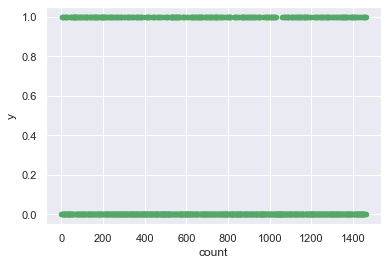

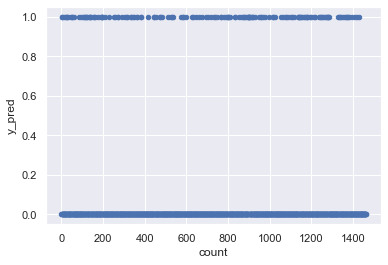

In [125]:
y_compare = pd.DataFrame({"y":list(y_actual4),"y_pred":list(y_prediction4)}, index = range(0,len(y_actual4)))
y_compare["count"]=range(0,len(y_actual4))
y_compare

y_compare.plot(kind = "scatter", x="count",y="y", color='g')
y_compare.plot(kind = "scatter", x="count",y="y_pred")
plt.show()

# Naive Bayes Classification

In [126]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

print("accuracy of naive bayes: ", nb.score(x_test, y_test))

nb_score = nb.score(x_test, y_test)

accuracy of naive bayes:  0.6484268125854993


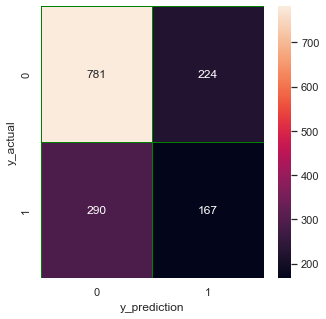

In [127]:
# Confusion matrix
y_prediction5 = nb.predict(x_test)
y_actual5 = y_test
cm = confusion_matrix(y_actual5, y_prediction5)

# heatmap
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True, linewidths=0.5, linecolor = "green", fmt = ".0f", ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


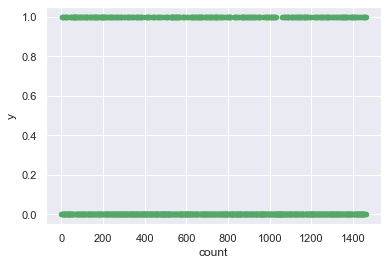

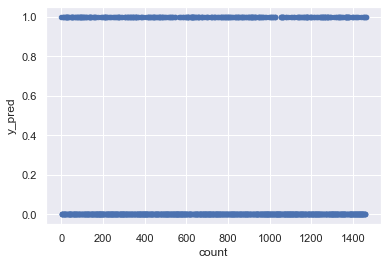

In [128]:
y_compare = pd.DataFrame({"y":list(y_actual5),"y_pred":list(y_prediction5)}, index = range(0,len(y_actual5)))
y_compare["count"]=range(0,len(y_actual5))
y_compare

y_compare.plot(kind = "scatter", x="count",y="y", color='g')
y_compare.plot(kind = "scatter", x="count",y="y_pred")
plt.show()

# Comparision Using Confusion matrix

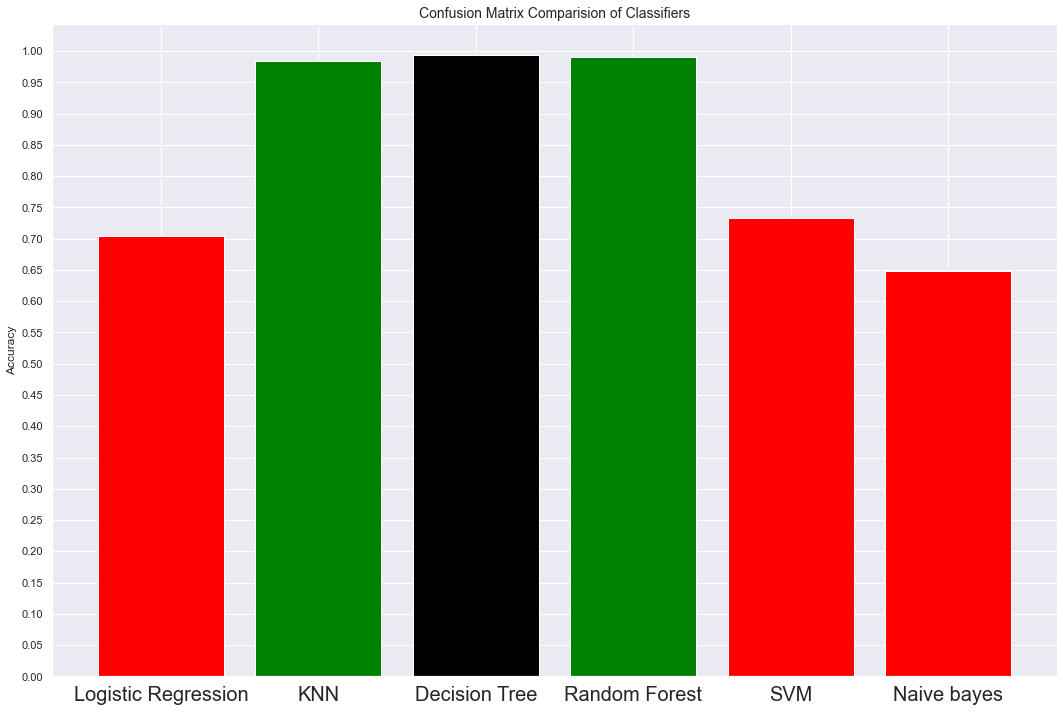

In [129]:

class_name = ("Logistic Regression", "KNN", "Decision Tree", "Random Forest", "SVM", "Naive bayes")
class_score = (lr_score, knn_score, dt_score, rf_score, svm_score, nb_score)
y_pos = np.arange(len(class_score))
colors = ("red", "green", "black","green", "red","red")
plt.figure(figsize=(18, 12))
plt.bar(y_pos, class_score, color=colors)
plt.xticks(y_pos, class_name, fontsize=20)
plt.yticks(np.arange(0.00, 1.05, step = 0.05))
plt.ylabel("Accuracy")

plt.title("Confusion Matrix Comparision of Classifiers", fontsize=14)
plt.savefig("graph.png")
plt.show()

In [130]:
dg.duplicated(subset=['loan_id']).sum()

0